# Proyecto 2 - Grupo 2 - M&S

# Maximización de funciones con simulated anealing

A continuación presentamos una implementación básica del método de simulatedd anealing para optimizar funciones tales que 
$f : \mathbb{R} \rightarrow \mathbb{R}$. 

Además, comparamos los resultados del aloritmo implementado aquí del método de simulated anealing con los que se obtienen mediante uno de los métodos de optimización de funciones más populares: descenso gradiente (se utilizó la implementación de scipy del método BFGS)

Ambos métodos de optimización de funciones se aplicaron primero a una función parabólica básica con un solo máximo global, y después a una función de Rastrigin con varios máximos locales para evaluar cuál de los 2 métodos era más sensible a este tipo de problemas.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import optimize

### Implementación del método de simulated anealing.

La implementación que se presenta a continuación es relativamente sencilla y trata de apegarse al máximo a la versión original (el método puede mejorarse, y además deja much libertad en cuanto a la manera en que se ejecutan los diferenes pasos del algoritmo). Además, la versión implementada es una variante que permite encontrar el máximo de una función (o el mínimo si la invertimmos).

Esencialmente consta de **3** parámetros:

    1. s_0 : La estimación inicial del punto en el dominio donde se encuentra el máximo
    2. f   : La función a optimizar
    3. k_max: El número máximo de iteraciones permitidas.
    
Luego, en cada iteración, el algorítmo pasa por 3 etápas:

    1. Reducción de la "temperatura" de acuerdo a una función de decaimiento dada.
    2. Proponer un nuevo candidato (vecino al máximo actual) a ser el máximo. (Este se escoje de forma aleatoria siguiendo              una distribución dada)
    3. Evaluar el potencial del nuevo candidato:
            Si es mejor, este se guarda
            Si no es mejor entonces se escoje en función de una probabilidad dada.

In [2]:
def simulated_anealing(S_0, f, k_max  ):
    
    difs = []  #Regitro de la diferencia entre el potencial de las muestras
    s = S_0
    
    for k in range(k_max):
        
        T = 1/(k+1) #Decaimiento de la temperatura
        
        s_new = s + (5-10*random.random())*np.random.normal(s, np.sqrt(T))  #seleccion basada en una distribución normal
                                                                            # centrada en s y con desviación = raiz cuadrada de T
        
        if (f(s_new) > f(s)): #si el nuevo candidato es mejor (mayor al ser evaluado en f) entonces lo guardamos como el mejor
            s = s_new
            
            
        else:  #si no se cumple la condición anterior, entonces aun puede ser seleccionado si cumple la probabilidad
        
            prob_select = np.exp(-(np.abs(f(s_new) - f(s))) /T) 
            draw = random.random()
            
            if (draw < prob_select):
                s = s_new
        
        difs.append(np.abs(f(s_new)-f(s)))  #guardar el error de la nueva aproximacion comparada con la anterior
        
        if( k % 10 == 0):
            print('T = {}        s = {}        f(s) = {}'.format(T, s, f(s)))
            
    print('¡Listo!')
    print('X_max = ', s, ' Val_max = ', f(s))        
            
    return s, f(s), difs     #retornar los valores de interés
    
    

### Aplicación del método de simulated anealing y comparación con el descenso gradiente sobre la parábola: $ f(x) = -0.2(x-2)^2 + 3 $

In [3]:
def parabola_invertida(x):  #definicion de la parabola
    
    return -0.2*(x-2)**2 +3
    

#### Gráfica de la parábola

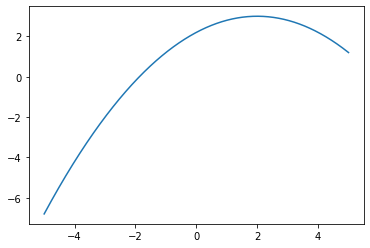

In [4]:
x = np.linspace(-5,5,1000)
y = [parabola_invertida(k) for k in x]

plt.plot(x,y)

#### Prueba con simulated anealing:

In [18]:
x_max, max_val, difs = simulated_anealing(10, parabola_invertida, 100)

T = 1.0        s = 10        f(s) = -9.8
T = 0.09090909090909091        s = 9.55594163769054        f(s) = -8.418450806437118
T = 0.047619047619047616        s = 0.43599076402578263        f(s) = 2.510775021957469
T = 0.03225806451612903        s = 2.064285046412958        f(s) = 2.9991734865615367
T = 0.024390243902439025        s = 1.8003612900657324        f(s) = 2.9920288770991563
T = 0.0196078431372549        s = 1.8003612900657324        f(s) = 2.9920288770991563
T = 0.01639344262295082        s = 1.8003612900657324        f(s) = 2.9920288770991563
T = 0.014084507042253521        s = 1.570734582732385        f(s) = 2.963146240307612
T = 0.012345679012345678        s = 2.07968336549774        f(s) = 2.998730112252591
T = 0.01098901098901099        s = 2.081487896831171        f(s) = 2.9986719445340064
¡Listo!
X_max =  2.081487896831171  Val_max =  2.9986719445340064


#### NOTA:

El método encontró el máximo global en $x \approx 2$ donde $f(2) = 3$ lo cuál es consistente con la gráfica de la parábola

Text(0, 0.5, 'f(s) - f(s_new)')

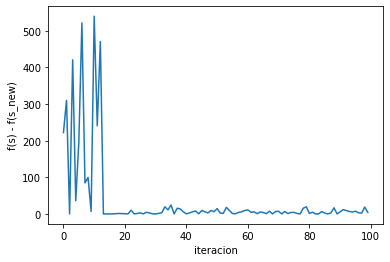

In [19]:
plt.plot(range(100), difs[:100])
plt.xlabel('iteracion')
plt.ylabel('f(s) - f(s_new)')


#### NOTA:

La gráfica anterior muestra el carácter "estocástico" de este método y se puede ver cómo a partir de la 10a iteración la diferencia entre los nuevos candidatos y el actual se va haciendo cada vez más pequeña. Esto muestra la convergencia progresiva del método hacia un óptimo.


#### Prueba con la implemetación de la librería scipy del método del descenso gradiente para optimizar funciones.

Ahora que hemos visto el funcionamiento del método del simulated anealing para una parábola básica mostramos para efectos de comparación el resultado obtenido para la misma parábola pero con el método "minimize" de la librería scipy.
Empleamos el método 'BFGS' que esencialmente permite aproximar de manera computacionalmente eficiente la 2da derivada de la función, y como punto incial de búsqued usamos el mismo que en el caso de simulated anealing, es decir: $x = 10$.

In [20]:
# para máximizar la función basta poner un (-1) antes de la función para que el método ejecute 
# la operación inversa a la minimización

resultado_BFGS_parabola = optimize.minimize(lambda x: -parabola_invertida(x), 10,  
                    method='BFGS')

resultado_BFGS_parabola

      fun: -2.9999999999999463
 hess_inv: array([[2.50000018]])
      jac: array([-2.08616257e-07])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([1.99999948])

#### NOTA: 

Como podemos ver en la celda anterior, el método del gradiente parece ser el más eficiente en este caso, ya que en tan solo 3 iteraciones encontró el máximo local y absoluto de la función, con un nivel mayor de precisión. Mientras que el método del simulated anealing tomó 100 iteraciones en encontrar una solución que a pesar de ser cercana al óptimo real, no es tan exacta como la encontrada por el método del gradiente.

### Aplicación del método de simulated anealing y comparación con el descenso gradiente sobre la función de Rastrigin.

La función de Rastrigin con frecuencia se utiliza para evaluar el desempeño de un algoritmo de optimización debido a la alta cantida de minimos y máximos locales. Esta función es dada por la expresión:

$$  f(\bf{x}) = nA + \sum_{i = 1}^{n} [x_i^2 -A\cos(2 \pi x_i)]$$
donde $\bf{x}$ es un vector $n-$dimensional, y $A = 10$.

En este caso solo trabajeremos con la versión $f: \mathbb{R} \rightarrow \mathbb{R} de la función. Por lo que para nuestro fines:

$$ f(x) = n*A + \sum_{i = 1}^{n}[x^2 -A\cos(2 \pi x)]  $$

Y $n$ será un entero positivo dado.


Para más detalles véase: https://en.wikipedia.org/wiki/Rastrigin_function#:~:text=In%20mathematical%20optimization%2C%20the%20Rastrigin,has%20been%20generalized%20by%20Rudolph. 

In [21]:
def mini_Rastrigin(x, n = 10):  #definir la funcion de Rastrigin 1 dimensional
    
    A = 10
    
    lista_terminos = []  #listamos los terminos de la sumatoria
    
    for i in range(n):
        
        termino = A*n - x**2 + A*np.cos(2*np.pi*x)  #Rastrigin
        
        lista_terminos.append(termino)
        
    return sum(lista_terminos)  #retornamos la suma
    

#### Gráfica de la función de Rastrigin.

Como podemos ver en la gráfica a continuación, la función de Rastrigin presenta una enorme cantidad de máximos locales, pero hay un máximo absoluto a pesar de todo, y se encuentra (para el caso $n = 10$) en $x = 0$.

¿Cómo evitar que un método de optimización se quede atrapado en alguno de los mínimos locales?

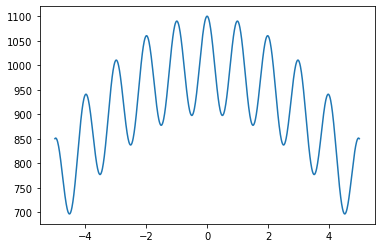

In [11]:
x = np.linspace(-5,5, 1000)

y = [mini_Rastrigin(k) for k in x]

plt.plot(x, y, '-')

#### Maximización de la funciónd de Rastrigin con simulated anealing.

Aplicamos primero el método de simulated anealing dándole como punto inicial de busqueda el punto $x = -2$. El cuál como podemos ver es particularmente complicado en este caso ya que no solo es un máximo local, pero además hay otro maximo local entre él y el maximo absoluto de la fucion.

In [22]:
x, fx, difs = simulated_anealing(-2, mini_Rastrigin, 100)

T = 1.0        s = -2        f(s) = 1060.0
T = 0.09090909090909091        s = -2        f(s) = 1060.0
T = 0.047619047619047616        s = -2        f(s) = 1060.0
T = 0.03225806451612903        s = -2        f(s) = 1060.0
T = 0.024390243902439025        s = -2        f(s) = 1060.0
T = 0.0196078431372549        s = -0.03136922176262058        f(s) = 1098.054046174801
T = 0.01639344262295082        s = -0.03136922176262058        f(s) = 1098.054046174801
T = 0.014084507042253521        s = -0.010250255568199477        f(s) = 1099.7916255965154
T = 0.012345679012345678        s = 0.001916469147612199        f(s) = 1099.9927134358736
T = 0.01098901098901099        s = 0.001916469147612199        f(s) = 1099.9927134358736
¡Listo!
X_max =  0.001916469147612199  Val_max =  1099.9927134358736


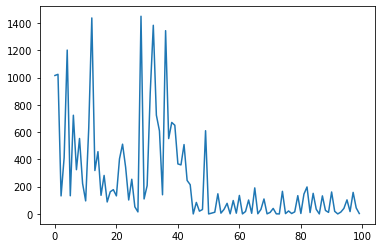

In [23]:
plt.plot(range(100), difs[:100])

#### NOTA:

Claramente, el método de simulated anealing no tuvo niguna dificultad en encontrar el máximo absoluto $x = 0$. Además ¡lo logró con una precisión de 2 cifras significativas en a penas 100 iteraciones!

Una vez, más la gráfica que se muestra en la celda anterior, conprueba el caracter estocástico del método. Y muestra cómo, a medida que converge hacia una solución, las oscilaciones entre soluciones propuestas se van reduciendo. Mostrando como el método se está "centrando" sobre una solución".

#### Maximización de la función de Rastrigin con descenso gradiente.

Ahora, para efectos de comparación, intentamos encontrar el máximo absoluto con la implementación de la librería scipy del método del descenso gradiente...

In [24]:
resultado_BFGS_rastrigin = optimize.minimize(lambda x: -mini_Rastrigin(x),-2,  
                    method='BFGS')

In [25]:
resultado_BFGS_rastrigin

      fun: -1090.050409429067
 hess_inv: array([[0.00025371]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 5
     njev: 11
   status: 0
  success: True
        x: array([-0.99495864])

#### ¡VAYA!

El método del desenso gradiente no funcionó. O para ser más exactos, encontró un máximo local (en -1) pero se quedó atrapado! ¡No logró encontrar el maximo absoluto de la función de Rastrigin!

Por lo tanto, el método de simulated anealing parece ser mucho más efectivo cuando hay varios máximos locales y un máximo absoluto.